In [9]:
# From https://www.learnrobotics.org/blog/arduino-data-logger-csv/
import serial
import csv
import numpy as np
import matplotlib.pyplot as plt

arduino_port = "/dev/ttyACM1" #serial port of Arduino
baud = 9600 #arduino uno runs at 9600 baud
ser = serial.Serial(arduino_port, baud)
print("Connected to Arduino port:" + arduino_port)

Connected to Arduino port:/dev/ttyACM1


In [10]:
#display the data to the terminal
import urllib.request
amplitude = 60
frequence = 3
print("Sending command to batbot...")
html = urllib.request.urlopen(f"http://192.168.43.246/${amplitude},{frequence}$")
print("Sent!")

print("Reading sensor...")
ser.write('t'.encode())
getData=ser.readline()
print("Read!")
dataString = getData.decode('utf-8')
array = np.fromstring(dataString[:-3], dtype=float, sep=',').reshape((-1,2))
array = np.unique(array, axis=0)

Sending command to batbot...
Sent!
Reading sensor...
Read!


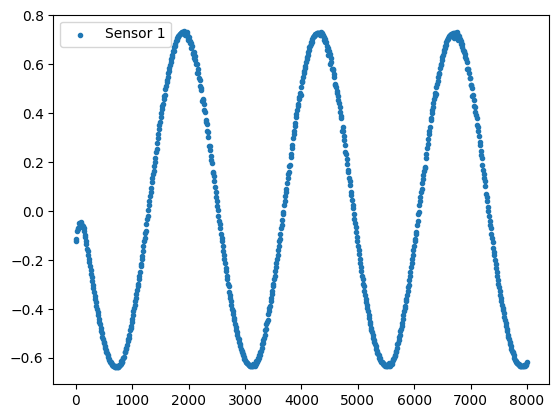

In [13]:

plt.scatter(array[:,0],array[:,1], label='Sensor 1', marker='.')
plt.legend()
plt.show()

In [12]:
def min_max_creator(min=210, max=970):
    return lambda x: (2 / (max-min)) * x + 1 - 2 * max / (max-min)


min_max = min_max_creator()
array[:,1] = min_max(array[:,1])

In [73]:
np.arange(80)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [74]:
array[:, 0]

array([   0.,   10.,   22.,   32.,   42.,   52.,   63.,   73.,   83.,
         94.,  105.,  115.,  125.,  135.,  146.,  157.,  167.,  177.,
        188.,  198.,  208.,  219.,  230.,  240.,  250.,  260.,  272.,
        282.,  292.,  302.,  312.,  323.,  334.,  344.,  354.,  365.,
        375.,  386.,  396.,  407.,  417.,  427.,  437.,  449.,  459.,
        469.,  479.,  490.,  501.,  511.,  521.,  532.,  542.,  552.,
        563.,  574.,  584.,  594.,  604.,  616.,  626.,  636.,  646.,
        657.,  667.,  678.,  688.,  699.,  709.,  719.,  730.,  741.,
        751.,  761.,  771.,  781.,  793.,  803.,  813.,  823.,  834.,
        845.,  855.,  865.,  876.,  886.,  896.,  907.,  918.,  928.,
        938.,  948.,  960.,  970.,  980.,  990., 1001., 1012., 1022.,
       1032., 1043., 1053., 1064., 1074., 1085., 1095., 1106., 1116.,
       1127., 1137., 1147., 1158., 1169., 1179., 1189., 1200., 1211.,
       1221., 1231., 1242., 1253., 1263., 1273., 1283., 1295., 1305.,
       1315., 1325.,

(-1.0, 1.0)

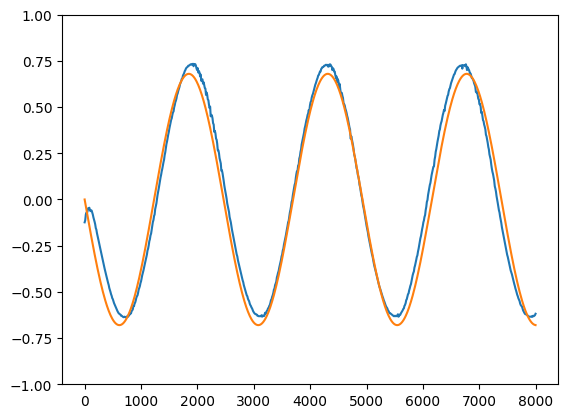

In [14]:
soll = lambda x: -0.68 * np.sin(0.00255* x)
plt.plot(array[:, 0], array[:, 1])
plt.plot(array[:, 0], soll(array[:, 0]))
plt.ylim((-1,1))


(-1.0, 1.0)

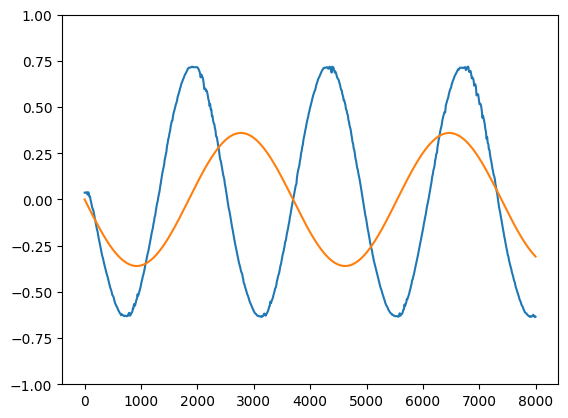

In [48]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, array[:, 0], array[:, 1])

print(params)

In [86]:
array[:,1] = min_max(array[:,1])

array([-0.        , -0.00611971, -0.01284927, -0.01896322, -0.02507169,
       -0.03178257, -0.03848233, -0.04456141, -0.05062762, -0.05667919,
       -0.06331693, -0.06993253, -0.07592556, -0.08189664, -0.08843743,
       -0.09435682, -0.10024895, -0.10669676, -0.11310726, -0.11890073,
       -0.12465984, -0.13038291, -0.13720073, -0.14283874, -0.14843548,
       -0.15398932, -0.16004708, -0.16550563, -0.17145473, -0.17681103,
       -0.18264388, -0.18789111, -0.19308403, -0.19873175, -0.20430997,
       -0.20931913, -0.2142678 , -0.21915455, -0.22397797, -0.2296805 ,
       -0.2343597 , -0.23897118, -0.24351359, -0.24842891, -0.25325736,
       -0.25757005, -0.26180831, -0.26638296, -0.27046095, -0.27446077,
       -0.27876892, -0.28297958, -0.28672164, -0.29038083, -0.2939561 ,
       -0.2981342 , -0.30152125, -0.30482116, -0.30803299, -0.31146314,
       -0.31448698, -0.3177082 , -0.3205402 , -0.32354838, -0.32618494,
       -0.32872724, -0.33141401, -0.33398489, -0.33622073, -0.33

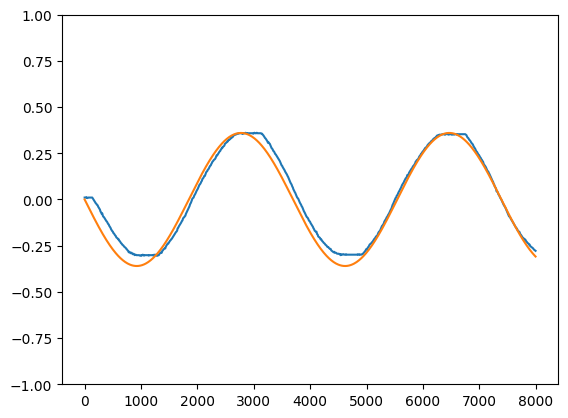

In [119]:
soll = -0.36*np.sin(0.0017*array[:,0])
plt.plot(array[:,0],array[:,1])
plt.plot(array[:,0], soll)
plt.ylim((-1,1))
plt.show()

In [121]:
soll-array[:,1]

array([-1.03896104e-02, -1.65093156e-02, -2.32388806e-02, -3.19502324e-02,
       -3.28638962e-02, -3.95747756e-02, -4.88719438e-02, -5.49510242e-02,
       -6.10172267e-02, -6.70687982e-02, -7.37065408e-02, -8.03221428e-02,
       -8.63151667e-02, -9.22862487e-02, -9.36322313e-02, -9.43568213e-02,
       -9.50541428e-02, -9.63071499e-02, -9.75228473e-02, -9.81215090e-02,
       -1.01283212e-01, -1.01811486e-01, -1.06031897e-01, -1.03877706e-01,
       -1.04279637e-01, -1.04638672e-01, -1.05501630e-01, -1.00570567e-01,
       -1.01324861e-01, -9.88889524e-02, -1.07319208e-01, -9.95794200e-02,
       -9.95775407e-02, -1.02627850e-01, -1.03011265e-01, -1.02825623e-01,
       -1.02579490e-01, -1.02271435e-01, -1.04497448e-01, -1.02407777e-01,
       -1.01892172e-01, -1.03906241e-01, -1.00656445e-01, -1.00376960e-01,
       -1.00010605e-01, -9.65310923e-02, -9.55745463e-02, -9.49543915e-02,
       -9.64349718e-02, -9.26425857e-02, -9.43533316e-02, -9.33691951e-02,
       -9.19164410e-02, -

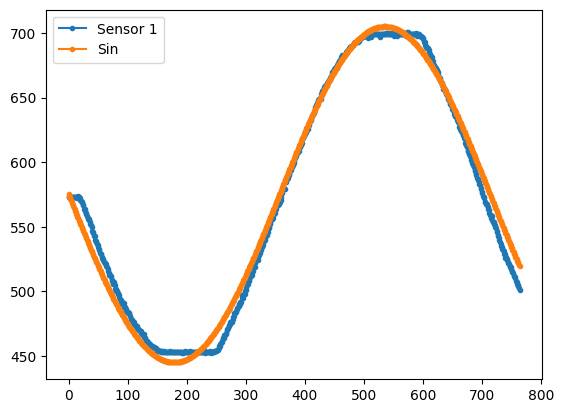

In [55]:
sin = 130*np.sin(-0.0088*np.arange(array.shape[0])) + 575
plt.plot(array[:,1], label='Sensor 1', marker='.')
plt.plot(sin, label='Sin', marker='.')
plt.plot()
plt.legend()
plt.show()